In [16]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [17]:
%matplotlib inline

In [18]:
path_jan = "/kaggle/input/oceanography-copernicus-data/mercatorglorys12v1_gl12_mean_202001.nc"
path_july = "/kaggle/input/oceanography-copernicus-data/mercatorglorys12v1_gl12_mean_202007.nc"

# For January data

In [19]:
DS_jan = xr.open_dataset(path_jan)

In [20]:
subset = DS_jan[['thetao','so']].sel(time = slice("2020-01-01", "2020-01-31"))
subset

<xarray.Dataset>
Dimensions:    (time: 1, depth: 50, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-01-16T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

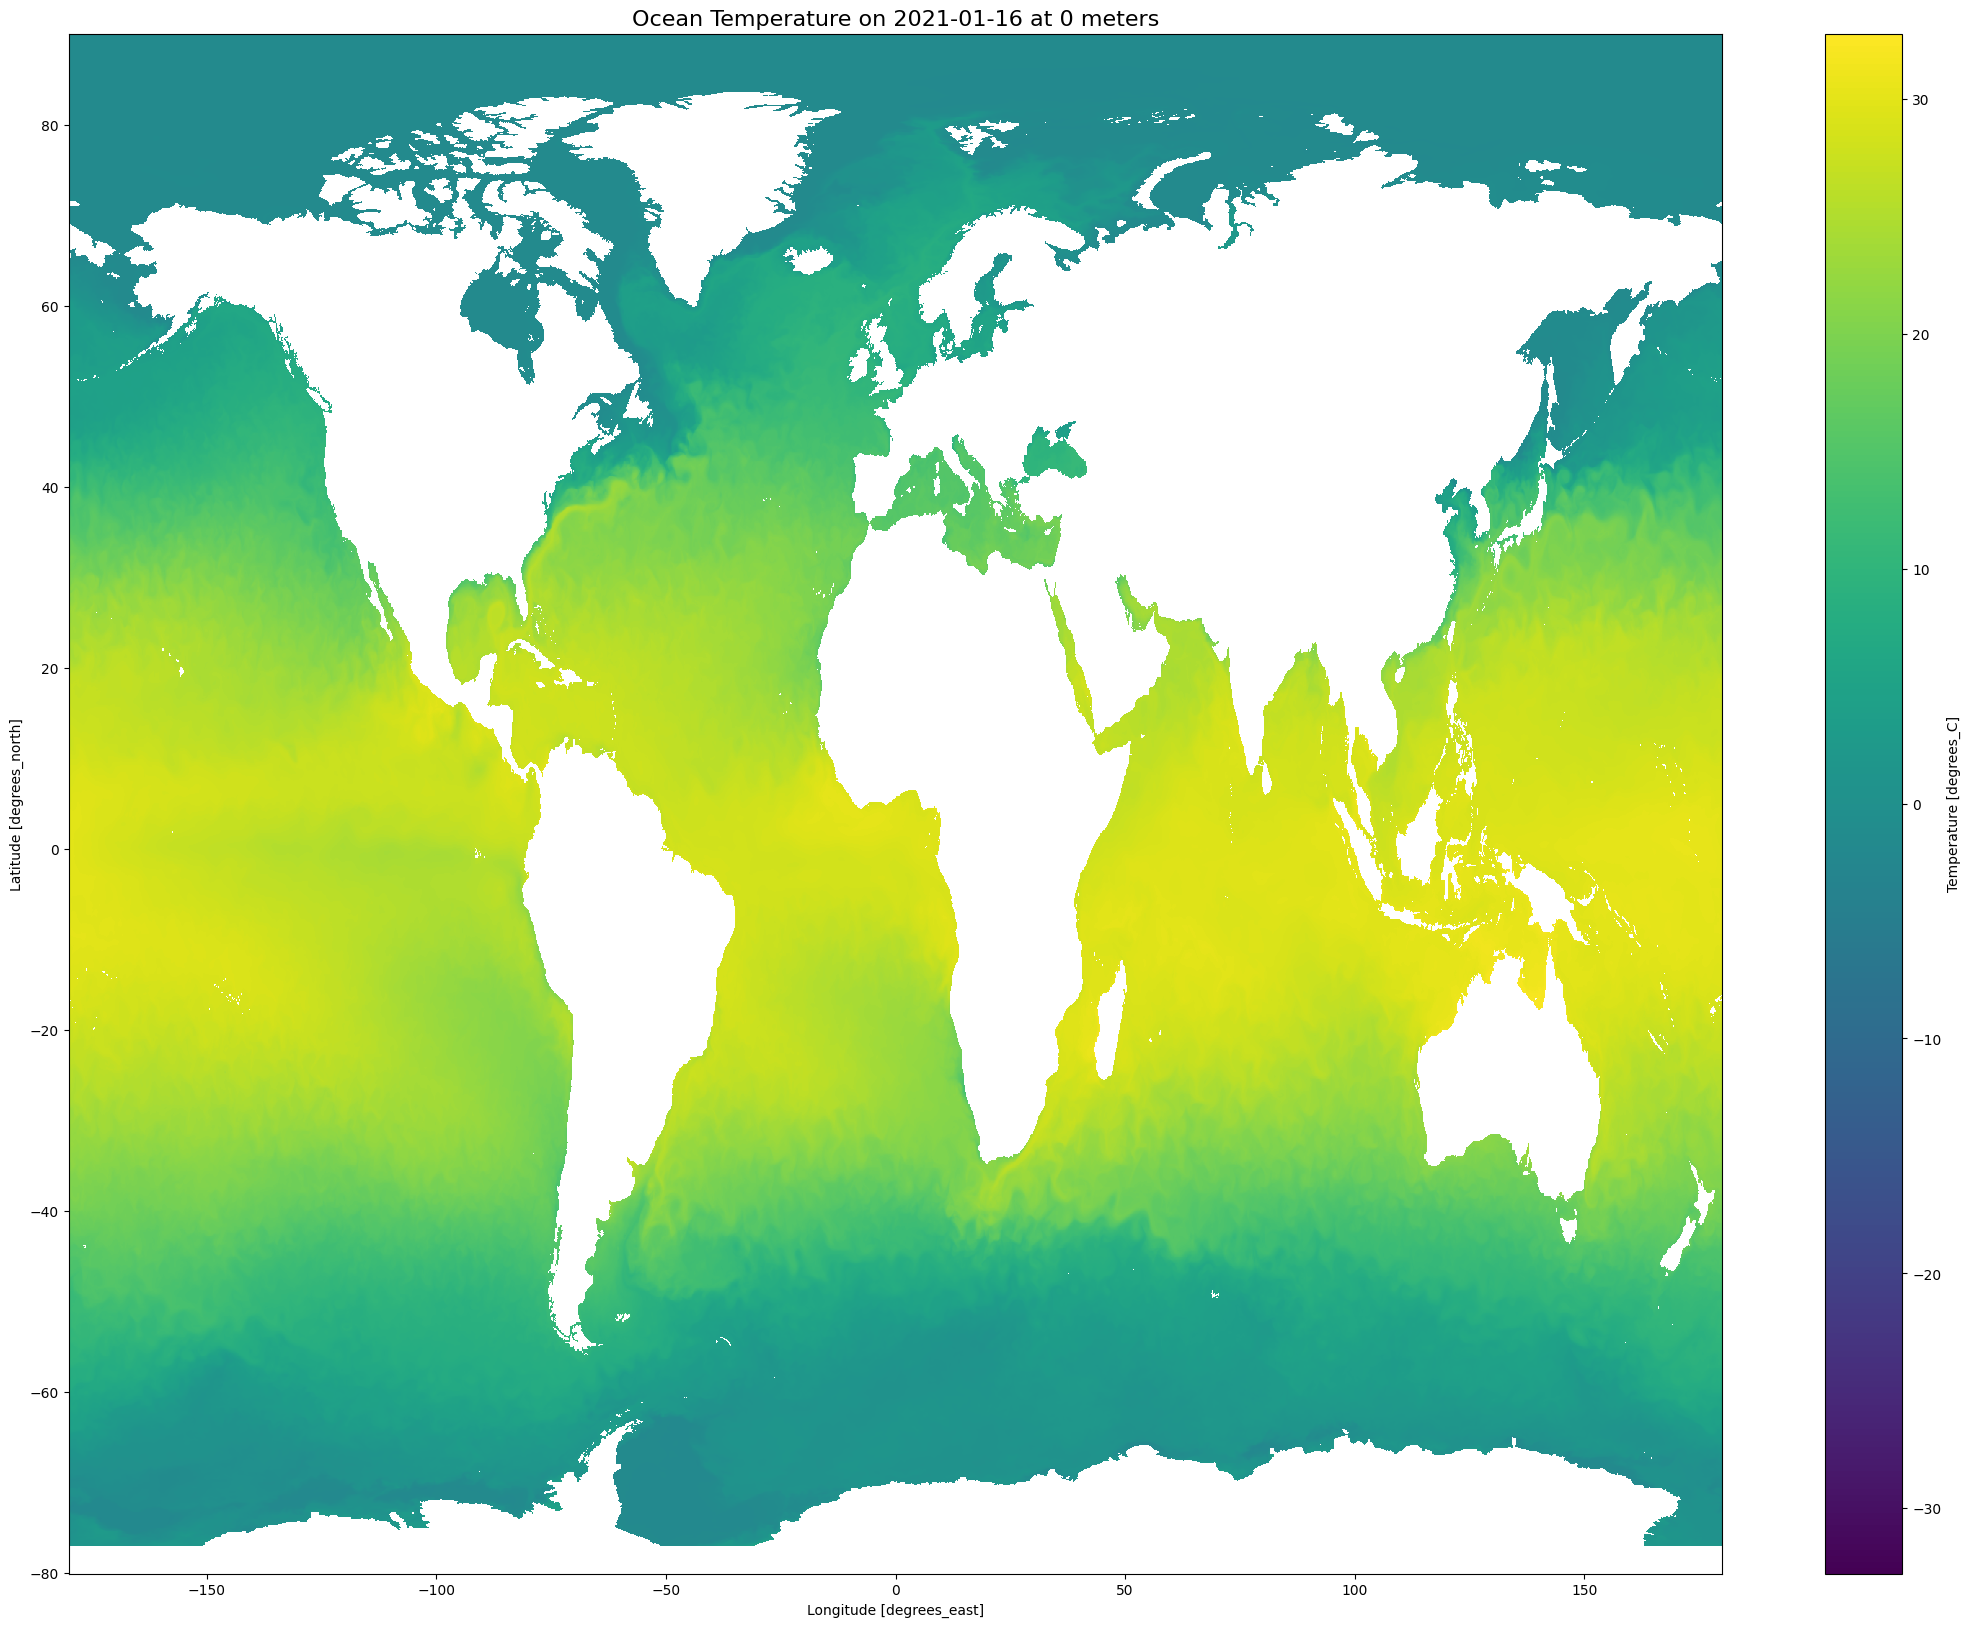

In [21]:
target_time = "2021-01-16"  #January
target_depth = 0      #surface

subset_T = subset.thetao.isel(depth=target_depth).sel(time = target_time, method = 'nearest')  

## Plot 
subset_T.plot(size = 20,cmap=plt.get_cmap('viridis'))

## Add title
title = f'Ocean {subset_T.long_name} on {str(target_time)} at {str(target_depth)} meters'       # set the title
plt.title(title, fontsize=16);

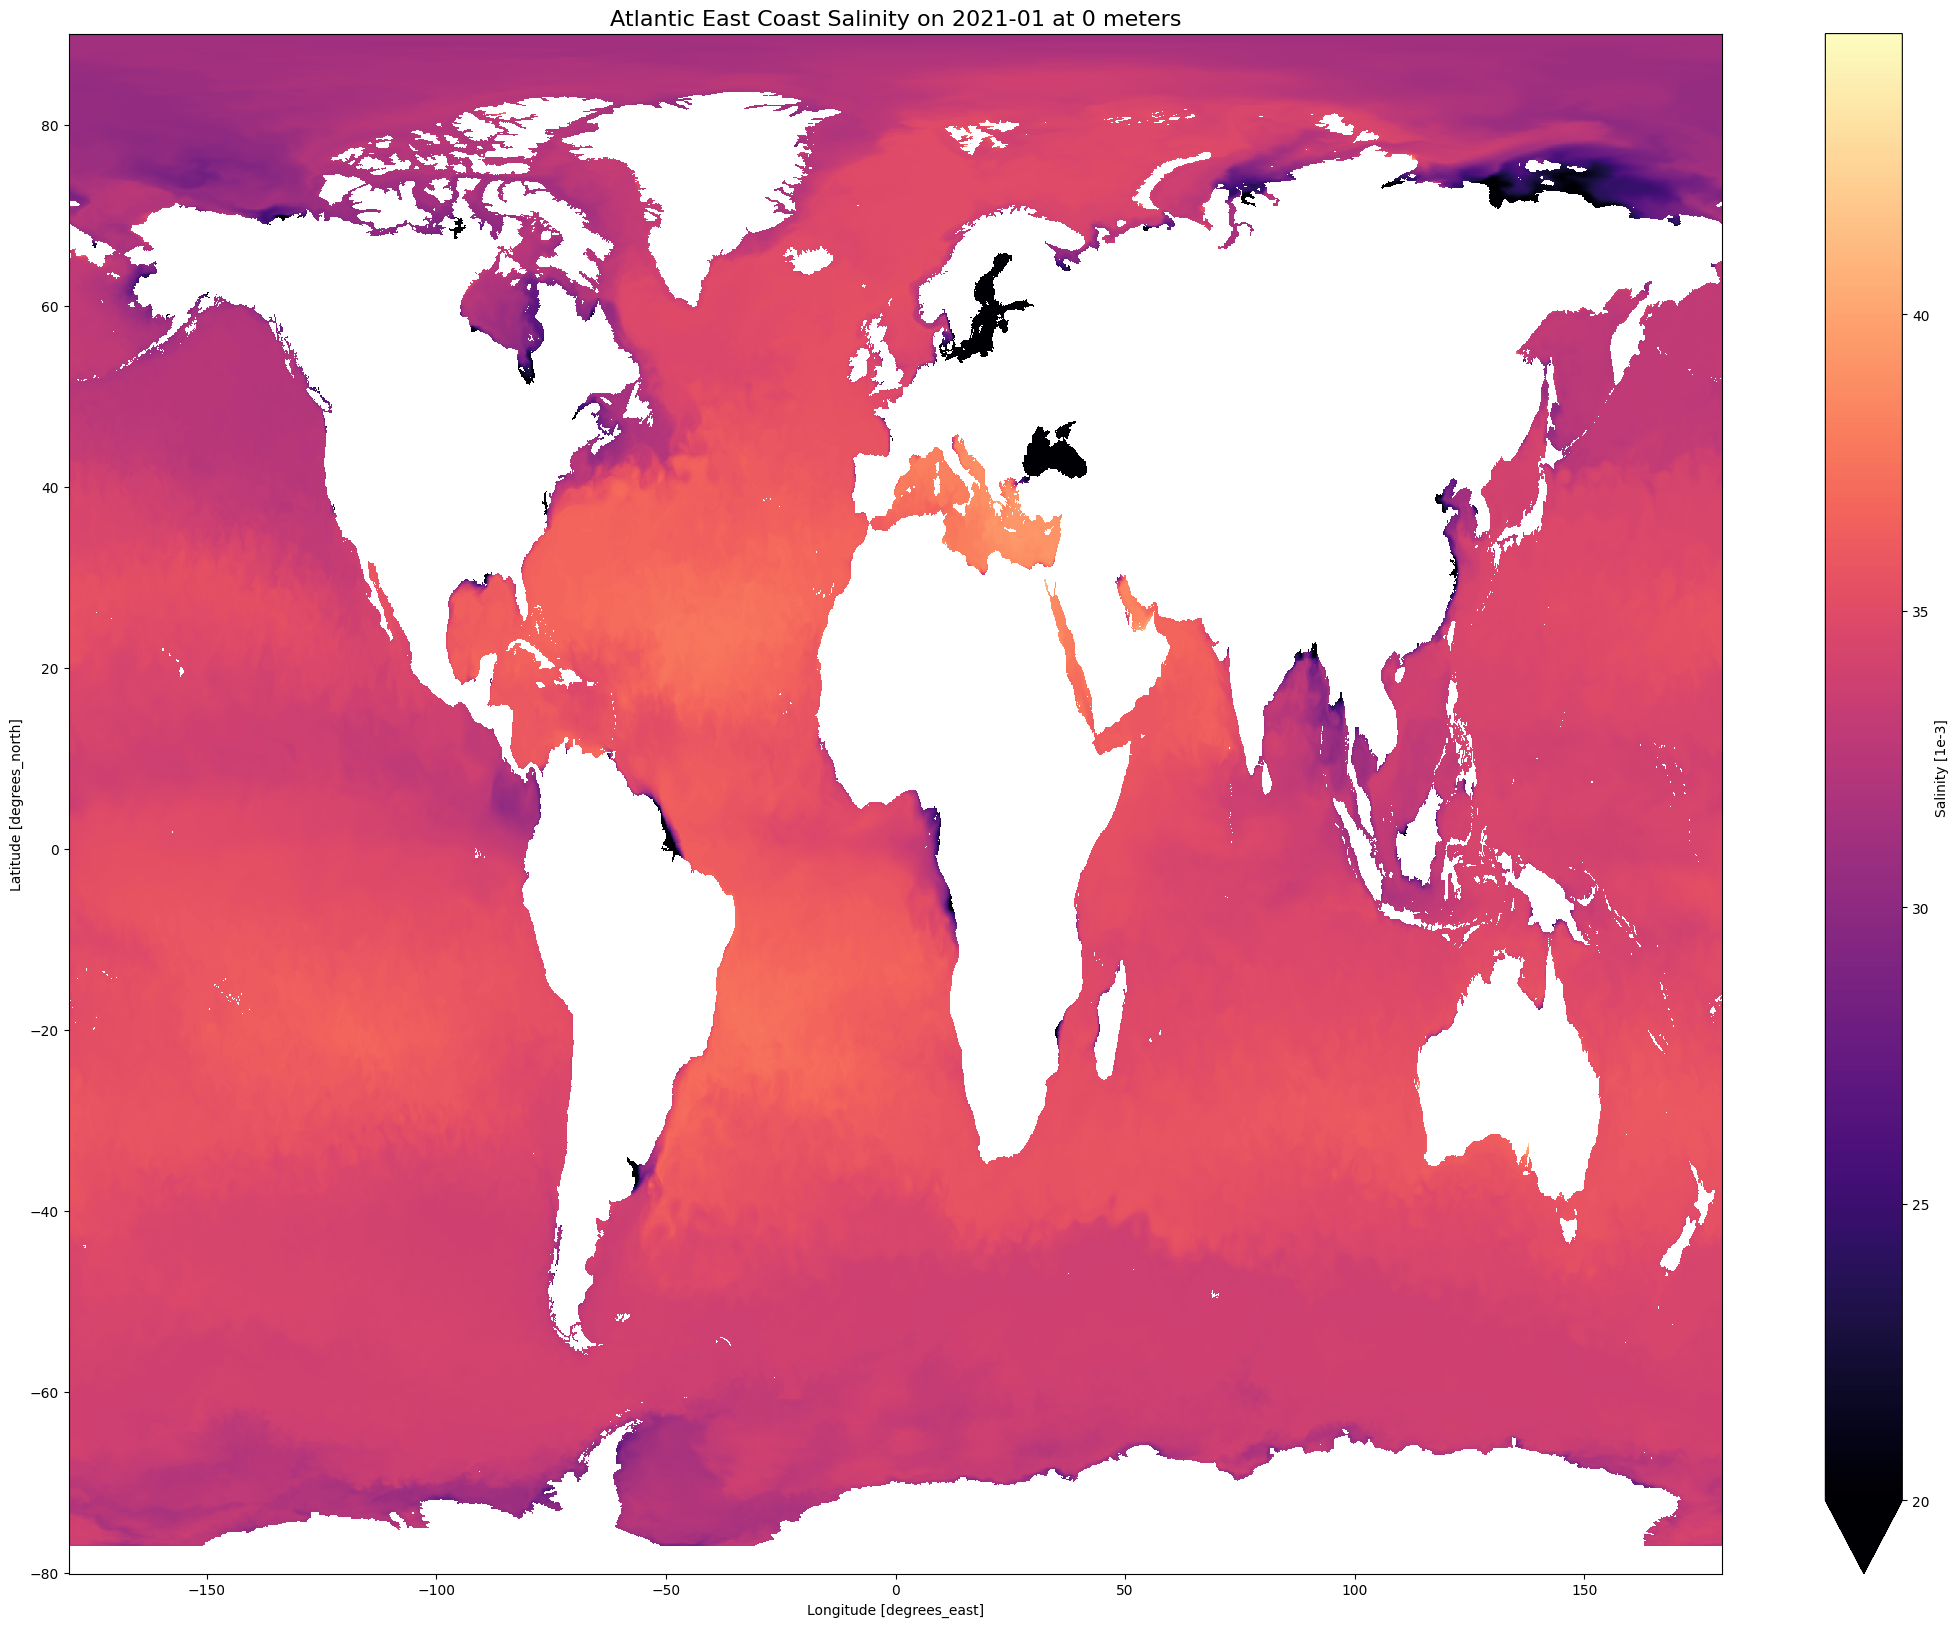

In [22]:
target_time = "2021-01"  #January
target_depth = 0         #surface

subset_T = subset.so.isel(depth=target_depth).sel(time = target_time, method = 'nearest')  

## Plot 
subset_T.plot(size = 20,cmap=plt.get_cmap('magma'),vmin=20)

## Add title
title = f'Atlantic East Coast {subset_T.long_name} on {str(target_time)} at {str(target_depth)} meters'       # set the title
plt.title(title, fontsize=16);

## For July data

In [23]:
DS_jul = xr.open_dataset(path_july)

In [24]:
subset_jul = DS_jul[['thetao','so']].sel(time = slice("2020-07-01", "2020-07-31"))
subset_jul

<xarray.Dataset>
Dimensions:    (time: 1, depth: 50, latitude: 2041, longitude: 4320)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

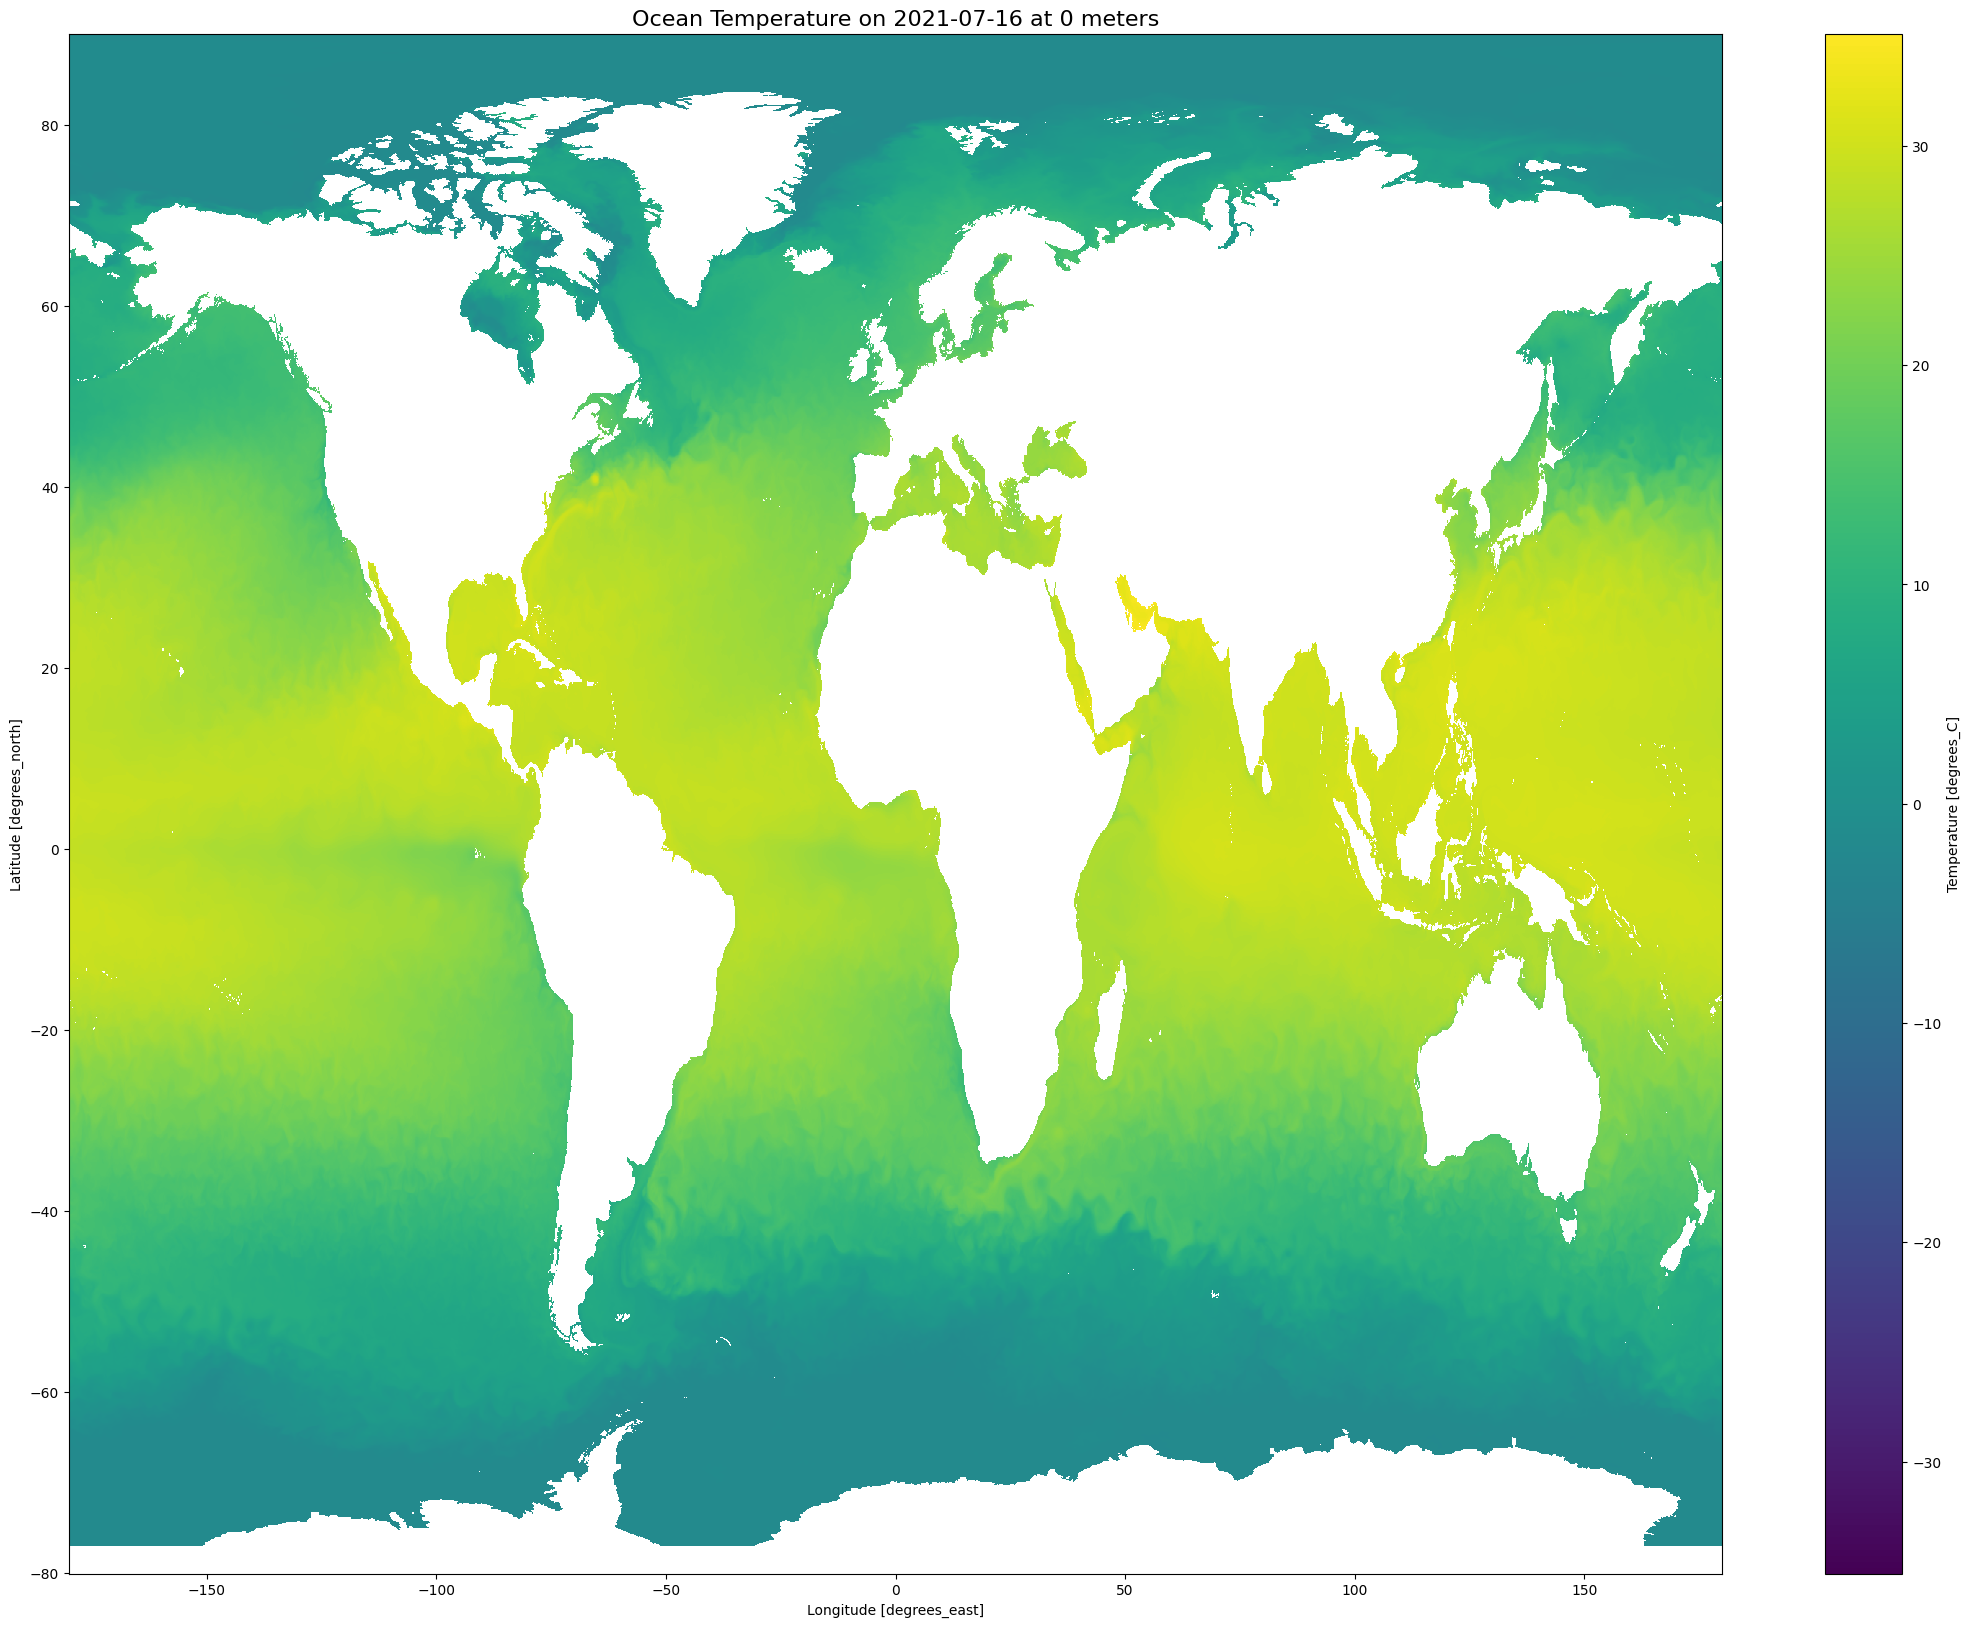

In [25]:
target_time = "2021-07-16"  #January
target_depth = 0      #surface

subset_T = subset_jul.thetao.isel(depth=target_depth).sel(time = target_time, method = 'nearest')  

## Plot 
subset_T.plot(size = 20,cmap=plt.get_cmap('viridis'))

## Add title
title = f'Ocean {subset_T.long_name} on {str(target_time)} at {str(target_depth)} meters'       # set the title
plt.title(title, fontsize=16);

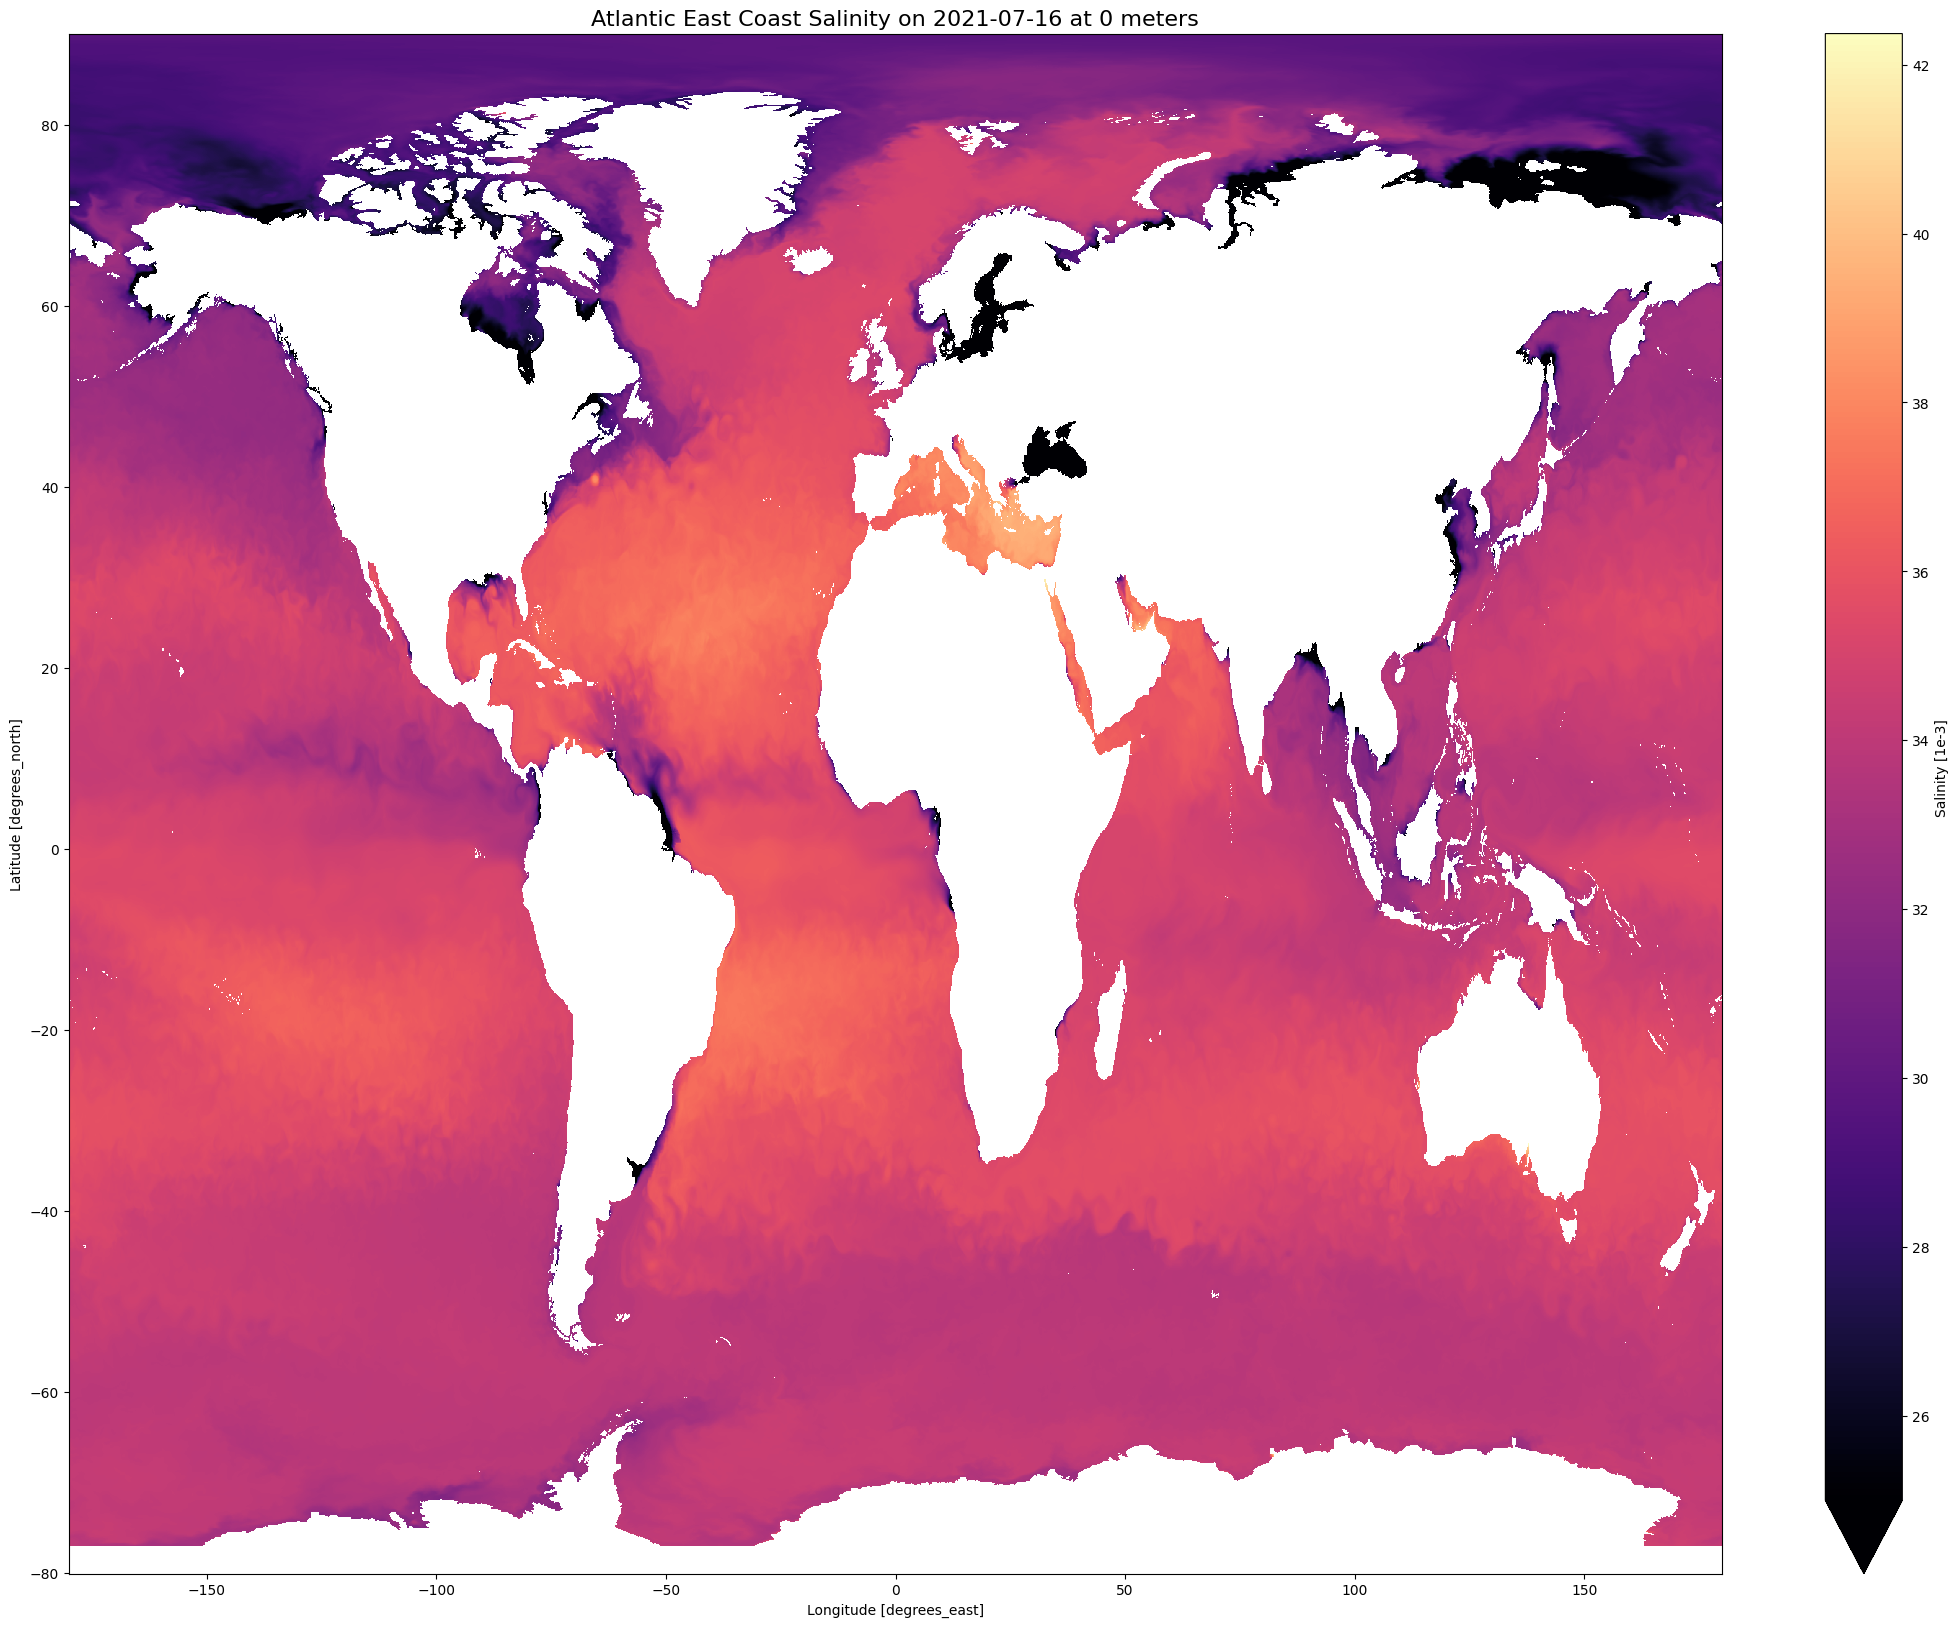

In [26]:
target_time = "2021-07-16"  #January
target_depth = 0         #surface

subset_T = subset_jul.so.isel(depth=target_depth).sel(time = target_time, method = 'nearest')  

## Plot 
subset_T.plot(size = 20,cmap=plt.get_cmap('magma'),vmin=25)

## Add title
title = f'Atlantic East Coast {subset_T.long_name} on {str(target_time)} at {str(target_depth)} meters'       # set the title
plt.title(title, fontsize=16);

## Comparison

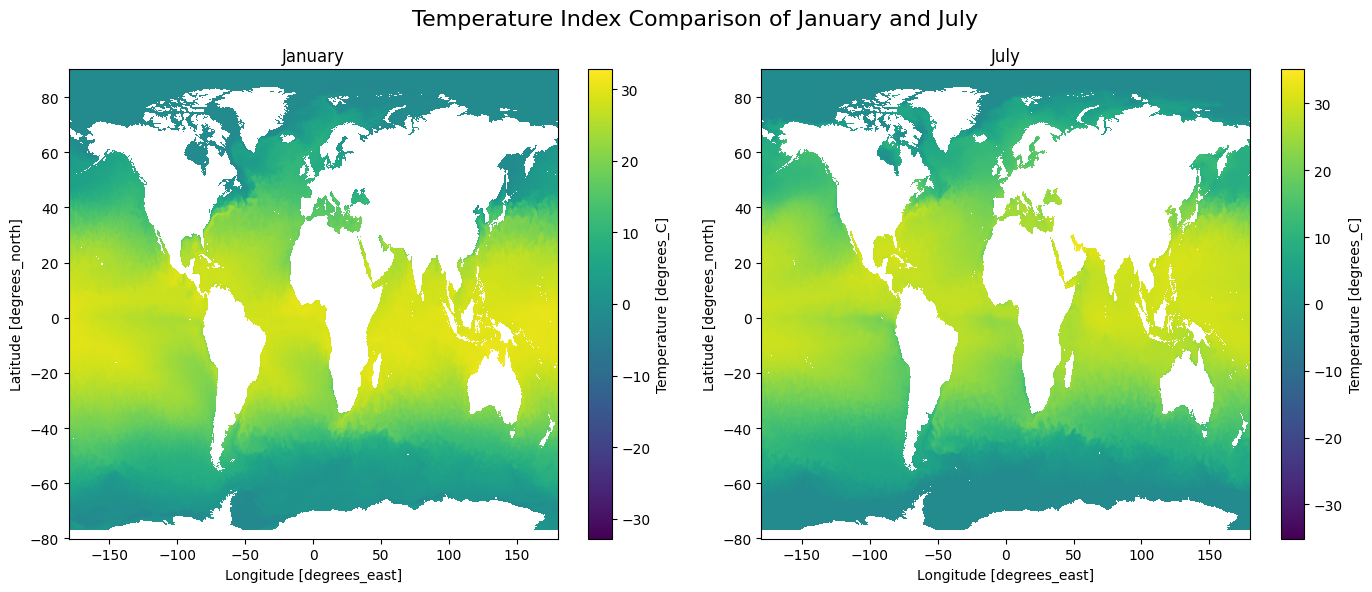

In [27]:
# Plotting both salinity indices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# January plot
target_time_jan = "2021-01"
subset_T_jan = subset.thetao.isel(depth=target_depth).sel(time=target_time_jan, method='nearest')
subset_T_jan.plot(ax=axes[0], cmap=plt.get_cmap('viridis'))
axes[0].set_title("January")

# July plot
target_time_jul = "2021-07-16"
subset_T_jul = subset_jul.thetao.isel(depth=target_depth).sel(time=target_time_jul, method='nearest')
subset_T_jul.plot(ax=axes[1], cmap=plt.get_cmap('viridis'))
axes[1].set_title("July")

# Setting overall title and adjusting layout
fig.suptitle("Temperature Index Comparison of January and July", fontsize=16)
plt.tight_layout()
plt.show()


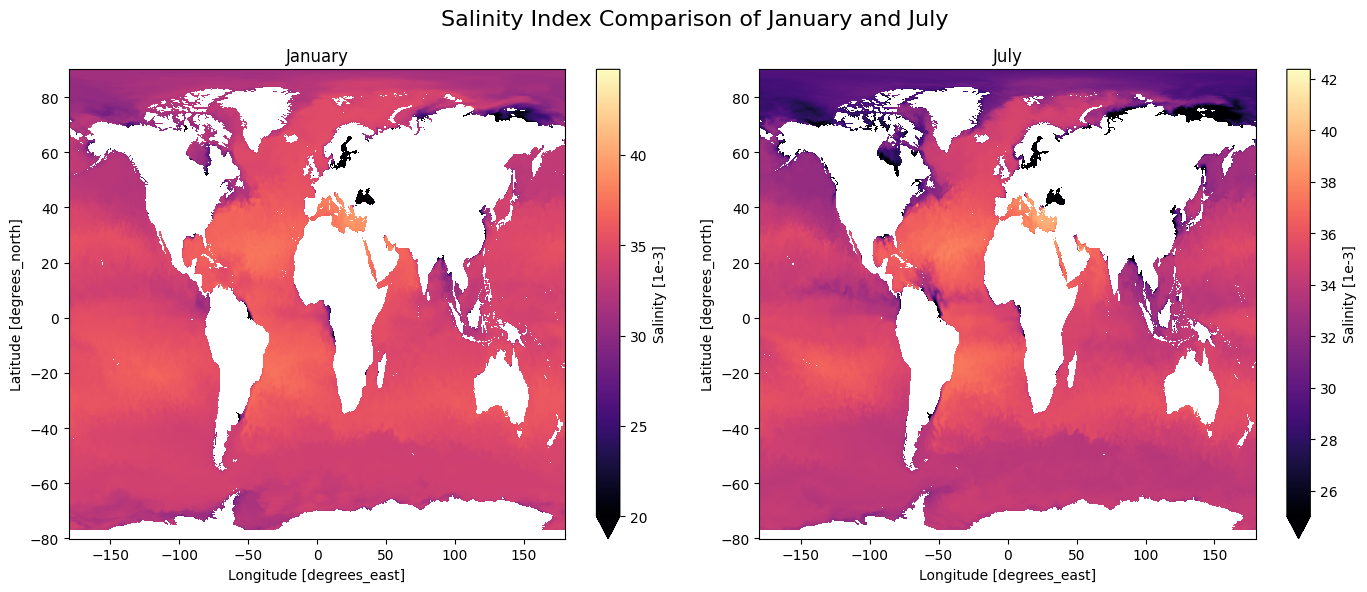

In [28]:
# Plotting both salinity indices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# January plot
target_time_jan = "2021-01"
subset_T_jan = subset.so.isel(depth=target_depth).sel(time=target_time_jan, method='nearest')
subset_T_jan.plot(ax=axes[0], cmap=plt.get_cmap('magma'), vmin=20)
axes[0].set_title("January")

# July plot
target_time_jul = "2021-07-16"
subset_T_jul = subset_jul.so.isel(depth=target_depth).sel(time=target_time_jul, method='nearest')
subset_T_jul.plot(ax=axes[1], cmap=plt.get_cmap('magma'), vmin=25)
axes[1].set_title("July")

# Setting overall title and adjusting layout
fig.suptitle("Salinity Index Comparison of January and July", fontsize=16)
plt.tight_layout()
plt.show()


## Verticle Profiling in January

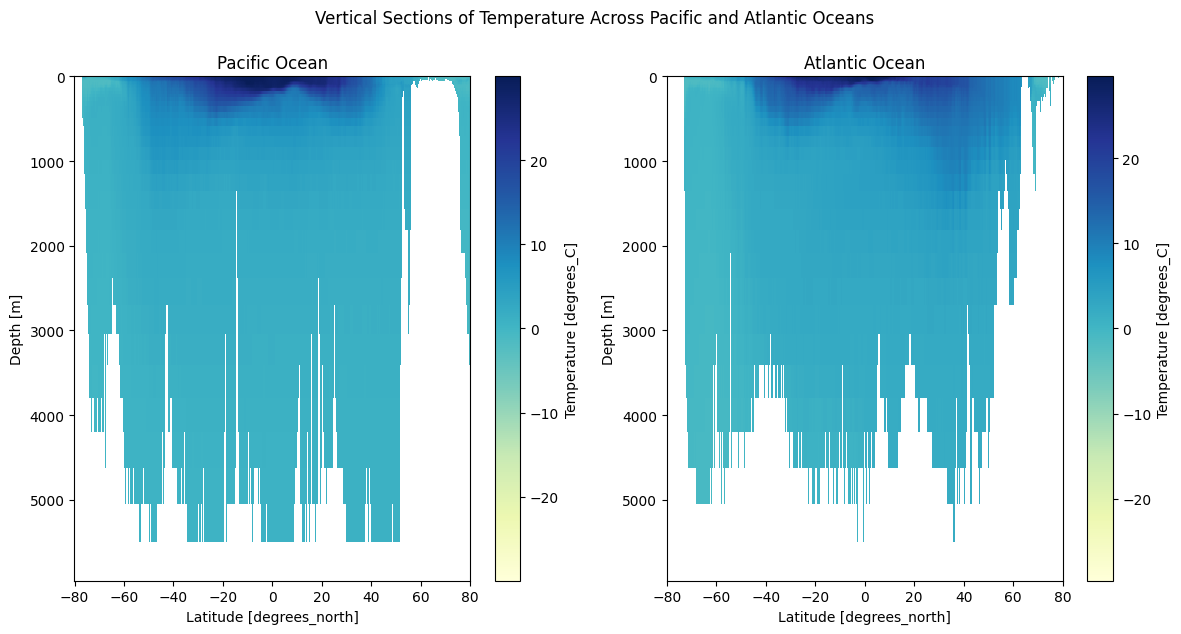

In [29]:
# Define the start and end points of the transect for the Pacific Ocean
pacific_start_point = {"lat": -80, "lon": -170}
pacific_end_point = {"lat": 80, "lon": -170}

# Extract temperature data along the Pacific transect
pacific_transect_data = subset.thetao.sel(latitude=slice(pacific_start_point["lat"], pacific_end_point["lat"]),
                                          longitude=slice(pacific_start_point["lon"], pacific_end_point["lon"]))

# Create a vertical section plot for the Pacific Ocean
plt.figure(figsize=(12, 6))

# Plot for the Pacific Ocean
plt.subplot(1, 2, 1)
pacific_transect_data.plot(cmap='YlGnBu')
plt.gca().invert_yaxis()
plt.title('Pacific Ocean')

# Define the start and end points of the transect for the Atlantic Ocean
atlantic_start_point = {"lat": -80, "lon": -20}  # Assuming 30 degrees longitude for the Atlantic
atlantic_end_point = {"lat": 80, "lon": -20}

# Extract temperature data along the Atlantic transect
atlantic_transect_data = subset.thetao.sel(latitude=slice(atlantic_start_point["lat"], atlantic_end_point["lat"]),
                                           longitude=slice(atlantic_start_point["lon"], atlantic_end_point["lon"]))

# Plot for the Atlantic Ocean
plt.subplot(1, 2, 2)
atlantic_transect_data.plot(cmap='YlGnBu')
plt.gca().invert_yaxis()
plt.title('Atlantic Ocean')

# Adjust layout and add a common title
plt.tight_layout()
plt.suptitle('Vertical Sections of Temperature Across Pacific and Atlantic Oceans', y=1.05)

# Show the plot
plt.show()


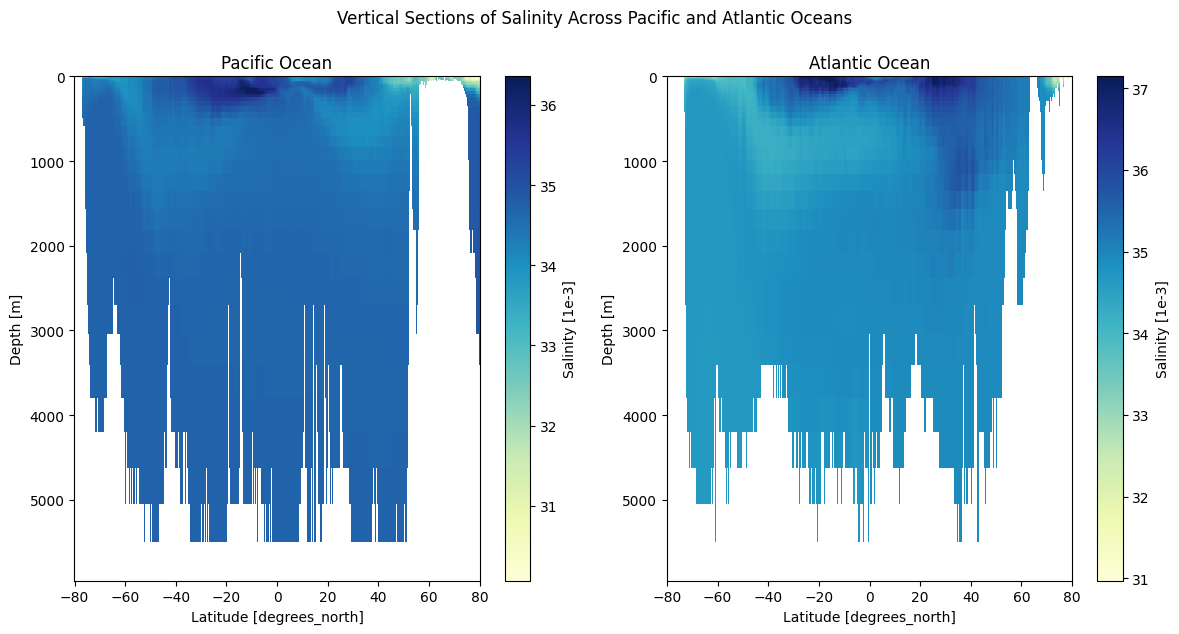

In [30]:
# Define the start and end points of the transect for the Pacific Ocean
pacific_start_point = {"lat": -80, "lon": -170}
pacific_end_point = {"lat": 80, "lon": -170}

# Extract temperature data along the Pacific transect
pacific_transect_data = subset.so.sel(latitude=slice(pacific_start_point["lat"], pacific_end_point["lat"]),
                                          longitude=slice(pacific_start_point["lon"], pacific_end_point["lon"]))

# Create a vertical section plot for the Pacific Ocean
plt.figure(figsize=(12, 6))

# Plot for the Pacific Ocean
plt.subplot(1, 2, 1)
pacific_transect_data.plot(cmap='YlGnBu')
plt.gca().invert_yaxis()
plt.title('Pacific Ocean')

# Define the start and end points of the transect for the Atlantic Ocean
atlantic_start_point = {"lat": -80, "lon": -20}  # Assuming 30 degrees longitude for the Atlantic
atlantic_end_point = {"lat": 80, "lon": -20}

# Extract temperature data along the Atlantic transect
atlantic_transect_data = subset.so.sel(latitude=slice(atlantic_start_point["lat"], atlantic_end_point["lat"]),
                                           longitude=slice(atlantic_start_point["lon"], atlantic_end_point["lon"]))

# Plot for the Atlantic Ocean
plt.subplot(1, 2, 2)
atlantic_transect_data.plot(cmap='YlGnBu')
plt.gca().invert_yaxis()
plt.title('Atlantic Ocean')

# Adjust layout and add a common title
plt.tight_layout()
plt.suptitle('Vertical Sections of Salinity Across Pacific and Atlantic Oceans', y=1.05)

# Show the plot
plt.show()
